# Tensorflow basis

## Example 1

Eager calculations in tensorflow

Add two variables a = 1 and b = 10


In [2]:
# Example
import numpy as np
import tensorflow as tf

print(tf.executing_eagerly())

a = tf.Variable(1)
b = tf.Variable(10)
c = a + b
print(c.numpy())
print(c)

True
11
tf.Tensor(11, shape=(), dtype=int32)


## Example 2


In [3]:
# Example

@tf.function 
def add(a,b): 
  return a + b

def sub(a,b):
  return a - b  

a = tf.Variable(5) 
b = tf.Variable(6)
c = tf.Variable(1)

x = add(a,sub(b,c))
print(x.numpy())


10


In [4]:
import time
from datetime import datetime
tf.get_logger().setLevel('ERROR')

stamp=datetime.now().strftime("%Y%m%d=%H%M%S")
logdir='logs/func/%s' % stamp
writer =tf.summary.create_file_writer(logdir)
tf.summary.trace_on(graph=True,profiler=True)

x=add(a,sub(b,c))
with writer.as_default():
  tf.summary.trace_export(name='function_trace',step=0,profiler_outdir=logdir)

tf.summary.trace_off()
%reload_ext tensorflow
%tensorboard --logdir logs/func

UsageError: Line magic function `%tensorboard` not found.


In [5]:
import tensorflow as tf
tf.__version__

'2.4.1'

# Task 1

Calculate by Tensorflow folowing expression $y = a * b + c$.

a,b, and c are 2x2 matrixes. Numbers in matrixes depends on your choice.
Multiplication is elementwise.


In [6]:
#Write your code here


a=tf.constant([[2,1],[3,6]])
b=tf.constant([[4,1],[9,1]])
c=tf.constant([[0,2],[6,8]])

def demo(a,b,c): 
    return (a*b)+c

print(demo(a,b,c))

tf.Tensor(
[[ 8  3]
 [33 14]], shape=(2, 2), dtype=int32)


# Example 3

Draw a graf of the function $y=f(x)=x^2$ and its derivatice $y'=f'(x). Use Tensoflow for derivative calculation.

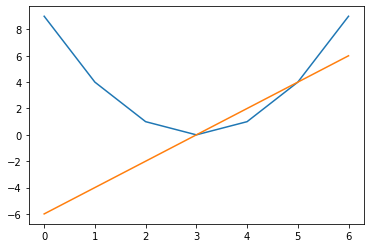

In [7]:
# Example
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.config.run_functions_eagerly(False)

@tf.function
def f(x):
  y = x*x
  return y

@tf.function
def dfdx(x):
  y = f(x)
  return tf.gradients(y, x)[0]

x = tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])


plt.plot(f(x))
plt.plot(dfdx(x))       

# Task 2

Draw a graf of the function $y=\sigma(x)=\frac{1}{1+e^{-x}}$ and its derivative $y'=s'(x)$. Use Tensoflow for derivative calculation.

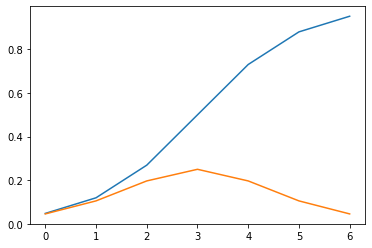

In [8]:
#Write your code here

@tf.function
def sigma(x):
    y=1/(1+tf.exp(-x))
    return y

@tf.function
def dsigma(x):
    y=sigma(x)
    return tf.gradients(y,x)[0]


x = tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])


plt.plot(sigma(x))
plt.plot(dsigma(x))       

# Task 3

Calculate the gradient of function $y=g(x,y)=e^{-\frac{x^2+y^2}{2\sigma^2}}$ for $\sigma^2 = 0.5\;\mbox{and}\;x = 1\;\mbox{and}\;y = 1$

In [11]:
#Write your code here
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
assert tf.executing_eagerly()

x=tf.Variable(1.,dtype=tf.float32)
y=tf.Variable(1.,dtype=tf.float32)
sigma=tf.Variable(0.5,dtype=tf.float32)


@tf.function
def gradient(x,y):
    return tf.math.exp(-1 * (tf.math.pow(x,2) + tf.math.pow(y,2)) / (2 * sigma))

@tf.function
def dgradient(x,y):
    y=gradient(x,y)
    return tf.gradients(y,x)[0]


print(dgradient(x,y).numpy())
print(dgradient(y,x).numpy())

-0.27067056
-0.27067056


In [6]:
tf.__version__

'2.6.2'

# Task 4

Create a simple neural feed forward neural network using Tensorflow.

Input layer -> hidden layer -> output layer

for IRIS dataset

In [98]:
#Write your code here

import pandas as pd

df=pd.read_csv(r'C:\Users\E0IN\Desktop\CC\iris.data',header=None)
df



,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [100]:
df_copy=df.copy()
df_copy[4].replace({'Iris-setosa':2,'Iris-versicolor':1,'Iris-virginica':0},inplace=True)
df_copy

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [130]:
conditions=[(df_copy[4]==2),(df_copy[4]==1),(df_copy[4]==0)]
values=['0,0,1','1,0,0','0,1,0']
df_copy['code'] = np.select(conditions,values)
df_copy[['Output[0]','Output[1]','Output[2]']]=df_copy['code'].str.split(',', expand=True)
df3=df_copy.copy()
df_copy.drop(['code',4],axis='columns',inplace=True)


In [144]:
df_copy['Output[0]'] = df_copy['Output[0]'].astype(int)
df_copy['Output[1]'] = df_copy['Output[1]'].astype(int)
df_copy['Output[2]'] = df_copy['Output[2]'].astype(int)

In [227]:

X=df_copy.iloc[:,0:4]
Y=df_copy.iloc[:,4:]


In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test  = train_test_split(X,Y,test_size = 0.3, random_state  = 1 )
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((105, 4), (45, 4), (105, 3), (45, 3))

In [220]:
model = Sequential()
model.add(Dense(5,activation ='relu'))
model.add(Dense(3,activation = 'softmax'))

In [221]:
model.compile(loss='mean_squared_error',optimizer = 'adam')

In [222]:
model.fit(X_train, y_train, shuffle=True, validation_split=0.1,
          batch_size=4, epochs= 250, verbose=2)

Epoch 1/250
24/24 - 5s - loss: 0.2870 - val_loss: 0.2918
Epoch 2/250
24/24 - 0s - loss: 0.2696 - val_loss: 0.2727
Epoch 3/250
24/24 - 0s - loss: 0.2563 - val_loss: 0.2583
Epoch 4/250
24/24 - 0s - loss: 0.2467 - val_loss: 0.2486
Epoch 5/250
24/24 - 0s - loss: 0.2403 - val_loss: 0.2411
Epoch 6/250
24/24 - 0s - loss: 0.2354 - val_loss: 0.2361
Epoch 7/250
24/24 - 0s - loss: 0.2321 - val_loss: 0.2319
Epoch 8/250
24/24 - 0s - loss: 0.2299 - val_loss: 0.2291
Epoch 9/250
24/24 - 0s - loss: 0.2282 - val_loss: 0.2269
Epoch 10/250
24/24 - 0s - loss: 0.2268 - val_loss: 0.2252
Epoch 11/250
24/24 - 0s - loss: 0.2259 - val_loss: 0.2240
Epoch 12/250
24/24 - 0s - loss: 0.2251 - val_loss: 0.2222
Epoch 13/250
24/24 - 0s - loss: 0.2242 - val_loss: 0.2215
Epoch 14/250
24/24 - 0s - loss: 0.2237 - val_loss: 0.2202
Epoch 15/250
24/24 - 0s - loss: 0.2233 - val_loss: 0.2196
Epoch 16/250
24/24 - 0s - loss: 0.2229 - val_loss: 0.2189
Epoch 17/250
24/24 - 0s - loss: 0.2226 - val_loss: 0.2185
Epoch 18/250
24/24 - 0s

Epoch 142/250
24/24 - 0s - loss: 0.0981 - val_loss: 0.1035
Epoch 143/250
24/24 - 0s - loss: 0.0975 - val_loss: 0.1042
Epoch 144/250
24/24 - 0s - loss: 0.0973 - val_loss: 0.1035
Epoch 145/250
24/24 - 0s - loss: 0.0966 - val_loss: 0.1034
Epoch 146/250
24/24 - 0s - loss: 0.0964 - val_loss: 0.1040
Epoch 147/250
24/24 - 0s - loss: 0.0957 - val_loss: 0.1028
Epoch 148/250
24/24 - 0s - loss: 0.0953 - val_loss: 0.1018
Epoch 149/250
24/24 - 0s - loss: 0.0949 - val_loss: 0.1016
Epoch 150/250
24/24 - 0s - loss: 0.0947 - val_loss: 0.1010
Epoch 151/250
24/24 - 0s - loss: 0.0941 - val_loss: 0.1012
Epoch 152/250
24/24 - 0s - loss: 0.0935 - val_loss: 0.1011
Epoch 153/250
24/24 - 0s - loss: 0.0932 - val_loss: 0.0997
Epoch 154/250
24/24 - 0s - loss: 0.0932 - val_loss: 0.1010
Epoch 155/250
24/24 - 0s - loss: 0.0923 - val_loss: 0.1000
Epoch 156/250
24/24 - 0s - loss: 0.0919 - val_loss: 0.0993
Epoch 157/250
24/24 - 0s - loss: 0.0915 - val_loss: 0.0994
Epoch 158/250
24/24 - 0s - loss: 0.0919 - val_loss: 0.09

In [223]:
pred_y1=model.predict(X_test)
pred_y2 = np.argmax(pred_y1,axis=1)
pred_y2

array([2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1,
       1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1,
       0], dtype=int64)

In [224]:
print(y_test.shape, pred_y2.shape)

(45, 3) (45,)


In [225]:
pred_y3 = np.argmax(y_test.to_numpy(),axis=1)
pred_y3

array([2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1,
       0], dtype=int64)

In [226]:
from sklearn.metrics import classification_report
print(classification_report(pred_y3, pred_y2))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.81      1.00      0.90        13
           2       1.00      1.00      1.00        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



In [ ]:
Write your code here